## Final Project Submission

Please fill out:
* Student name: Nicholus Magak
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Business Understanding

- Building a model to help relators price house in the KC area based on parameters such as: condition of a house, floors in a house, number of views done, bathrooms, sqft_living, grade of house, and sqft_above.

- The overall goal is that when the above parameters are combined, there can be a close guestimate for a house price such that the model will be used to price as many houses as possible in the region.


### Data Understanding

- I am currently using the KC House Data 

- The target is the potential house prices

- The predictors I am using: condition of a house, floors in a house, number of views done, bathrooms, sqft_living, grade of house, and sqft_above.

- My rule for the data is to at least have 10n of my model params. 8 * 10 = 80. I belive I have enough data.

### Import necessary libs

In [1]:
# Your code here - remember to use markdown cells for comments as well!

### Import necessary libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

kc_housing_data = pd.read_csv('data/kc_house_data.csv')

print(kc_housing_data[:5])

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  

## Data cleaning & preparation

### 1. Finding the columns with null values

In [2]:
## Data cleaning & preparation

# Finding the columns with null values
print(kc_housing_data.isna().sum())

print('This is the total amount of values in data:', len(kc_housing_data['id']))
print(kc_housing_data['waterfront'].unique())

## In the waterfront column there is 0 and 1 used as the categorical data
# current solution is to use the median of the data to fill null
kc_housing_data['waterfront'] = kc_housing_data['waterfront'].fillna(kc_housing_data['waterfront'].median())

print(kc_housing_data['view'].unique())

## In the view column, the data is 0, 1, 2, 3, 4 representing the overall 
# amount of times it has been viewed
kc_housing_data['view'] = kc_housing_data['view'].fillna(kc_housing_data['view'].mode()[0])

print(kc_housing_data['yr_renovated'].unique())

## In the year renovated, since there is no representation to show it has 
# been renovated otherwise, all null values get 0 to represent no renovation
kc_housing_data['yr_renovated'] = kc_housing_data['yr_renovated'].fillna(0)


# Final null value check
print(kc_housing_data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
This is the total amount of values in data: 21597
[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
id

In [3]:
kc_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### 2. Changing data types accordingly

In [4]:
## Changing data types accordingly
# changing price column to int
kc_housing_data['price'] = kc_housing_data['price'].astype('int')

## changing floors column to int
kc_housing_data['floors'] = kc_housing_data['floors'].astype('int')

## changing waterfront column to int
kc_housing_data['waterfront'] = kc_housing_data['waterfront'].astype('int')

## changing year renovated to int
kc_housing_data['yr_renovated'] = kc_housing_data['yr_renovated'].astype('int')

## changing view to int
kc_housing_data['view'] = kc_housing_data['view'].astype('int')


In [5]:
## Drop irrelevant columns
# 'date', 'sqft_living', 'sqft_lot', 'view', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
columns_to_drop = ['id', 'date', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'waterfront', 'yr_renovated', 'yr_built']

kc_manipulation_data = kc_housing_data.copy()
kc_manipulation_data = kc_manipulation_data.drop(columns_to_drop, axis=1)

### Categorical variables


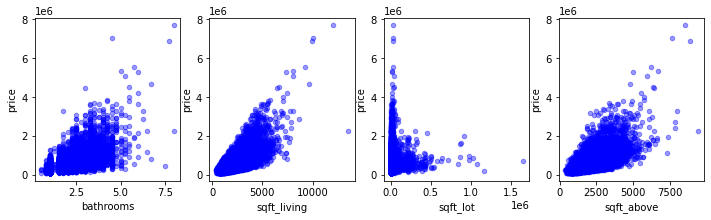

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3))

for xcol, ax in zip([ 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above'], axes):
    kc_manipulation_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

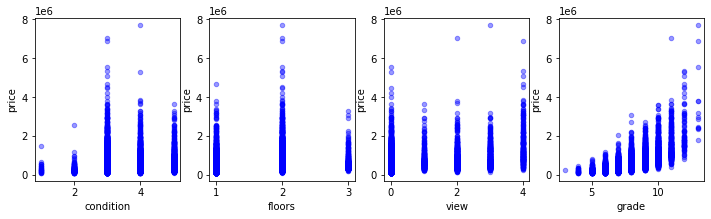

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3))

for xcol, ax in zip([ 'condition', 'floors', 'view', 'grade'], axes):
    kc_manipulation_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [8]:
# creating dummy variables
condition_dummies = pd.get_dummies(kc_manipulation_data['condition'], prefix='cond', drop_first=True)
floors_dummies = pd.get_dummies(kc_manipulation_data['floors'], prefix='floor', drop_first=True)
view_dummies = pd.get_dummies(kc_manipulation_data['view'], prefix='view')

# drop the old columns and replace with dummy columns
kc_manipulation_data = kc_manipulation_data.drop(['condition', 'floors', 'view'], axis=1)

kc_manipulation_data = pd.concat([kc_manipulation_data, condition_dummies, floors_dummies, view_dummies], axis=1)
kc_manipulation_data.head()

,price,bathrooms,sqft_living,sqft_lot,grade,sqft_above,cond_2,cond_3,cond_4,cond_5,floor_2,floor_3,view_0,view_1,view_2,view_3,view_4
0,221900,1.00,1180,5650,7,1180,0,1,0,0,0,0,1,0,0,0,0
1,538000,2.25,2570,7242,7,2170,0,1,0,0,1,0,1,0,0,0,0
2,180000,1.00,770,10000,6,770,0,1,0,0,0,0,1,0,0,0,0
3,604000,3.00,1960,5000,7,1050,0,0,0,1,0,0,1,0,0,0,0
4,510000,2.00,1680,8080,8,1680,0,1,0,0,0,0,1,0,0,0,0


### 3. Checking for Multicollinearity

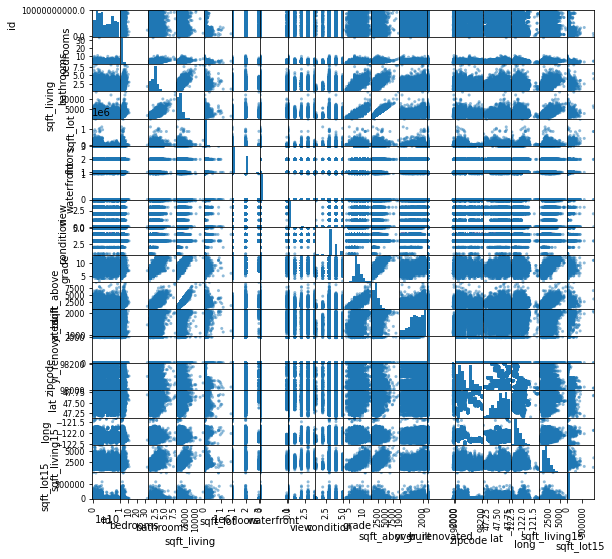

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [9]:
## Checking for Multicollinearity
# picking out my predictors only
kc_manipulation_data.head()
# remove the y (target)
kc_preds = kc_housing_data.drop(['price'], axis=1)
kc_preds.head()

# using a scatter plot to show the relationship between 
pd.plotting.scatter_matrix(kc_preds, figsize=[9, 9]);
plt.show()

abs(kc_preds.corr()) > 0.75


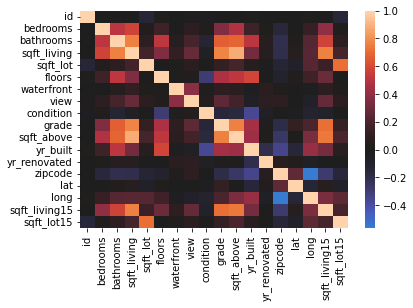

In [10]:
# heat map
import seaborn as sns
sns.heatmap(kc_preds.corr(), center=0);

#### The correlations on : ['bathrooms', 'sqft_living', 'grade', 'sqft_above'] are the highest and will be dealt with.

### Modeling using raw features

In [11]:
from statsmodels.formula.api import ols

In [12]:
outcome = 'price'
x_cols = ['bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'floor_2', 'floor_3']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_manipulation_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3598.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:59:23   Log-Likelihood:            -2.9991e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21590   BIC:                         5.999e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.528e+04   5576.214     -9.914      0.000   -6.62e+04   -4.44e+04
bathrooms     189.8808   3909.296      0.049      0.961   -7472.629    7852.390
sqft_living   290.4986      4.924     59.002      0.000     280.848     300.149
sqft_above      6.2490      5.253      1.190      0.234      -4.047      16.545
sqft_lot       -0.3118      0.044     -7.119      0.000      -0.398      -0.226
floor_2     -4.832e+04   5160.180     -9.364      0.000   -5.84e+04   -3.82e+04
floor_3      1.106e+05   1.13e+04      9.803      0.000    8.85e+04    1.33e+05
==============================================================================
Omnibus:                    14538.651   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           511807.983
Skew:                           2.757   Prob(JB):                         0.00
Kurtosis:                      26.202   Cond. No.                     2.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

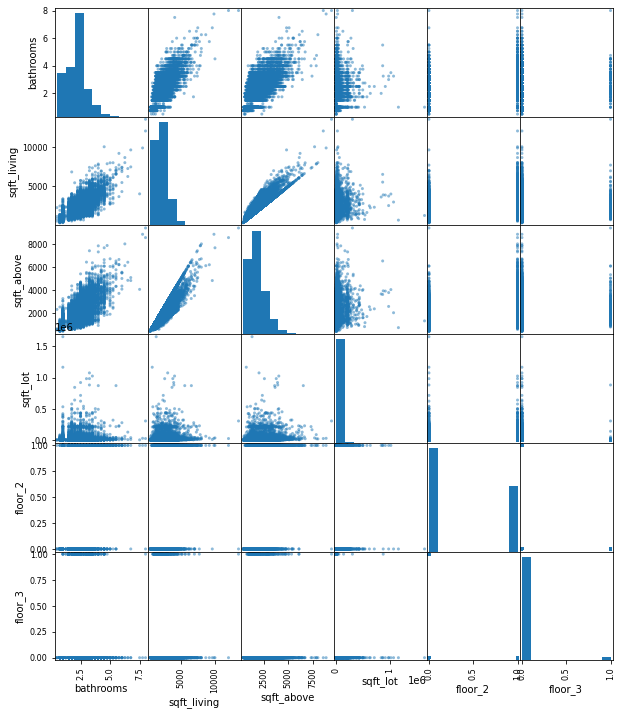

In [13]:
pd.plotting.scatter_matrix(kc_manipulation_data[x_cols], figsize=(10, 12));

### Transforming Non-Normal Features

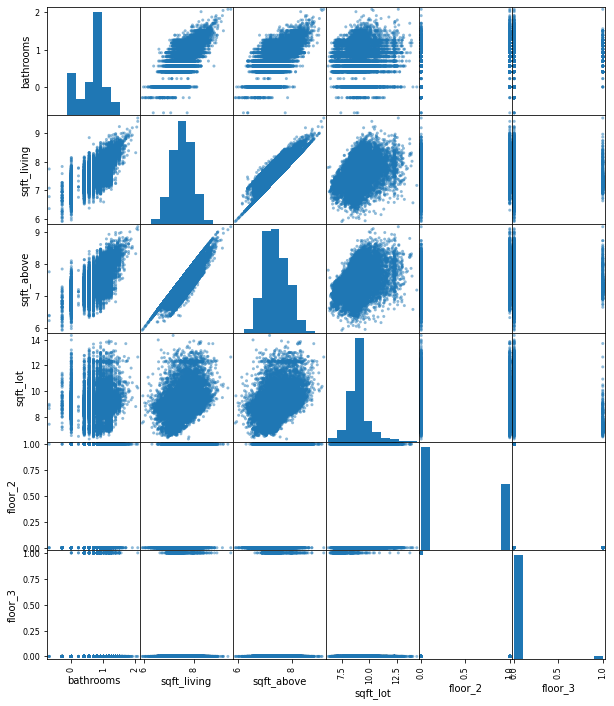

In [14]:
non_normal_x = ['bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot']
for feature in non_normal_x:
    # performing log transformation on non-normal features
    kc_manipulation_data[feature] = kc_manipulation_data[feature].map(lambda x: np.log(x))

pd.plotting.scatter_matrix(kc_manipulation_data[x_cols], figsize=(10,12));

### After transforming Non-Normal Features

In [15]:
outcome = 'price'
x_cols = ['bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'floor_2', 'floor_3']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_manipulation_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     2220.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:59:38   Log-Likelihood:            -3.0220e+05
No. Observations:               21597   AIC:                         6.044e+05
Df Residuals:                   21590   BIC:                         6.045e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.779e+06   5.28e+04    -71.542      0.000   -3.88e+06   -3.68e+06
bathrooms   -3.305e+04   8576.213     -3.853      0.000   -4.99e+04   -1.62e+04
sqft_living  5.111e+05   1.14e+04     44.660      0.000    4.89e+05    5.33e+05
sqft_above   9.477e+04   1.13e+04      8.399      0.000    7.27e+04    1.17e+05
sqft_lot    -2.261e+04   2655.209     -8.516      0.000   -2.78e+04   -1.74e+04
floor_2     -4.447e+04   6076.602     -7.319      0.000   -5.64e+04   -3.26e+04
floor_3      7.697e+04   1.35e+04      5.704      0.000    5.05e+04    1.03e+05
==============================================================================
Omnibus:                    19439.038   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1684792.174
Skew:                           3.991   Prob(JB):                         0.00
Kurtosis:                      45.527   Cond. No.                         379.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Feature Scaling and Normalization

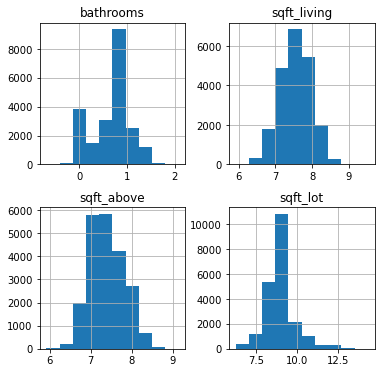

In [16]:
# Just a closer view of the individual columns after transformation
kc_manipulation_data[['bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot']].hist(figsize  = [6, 6]); 

### Min Max Scaling

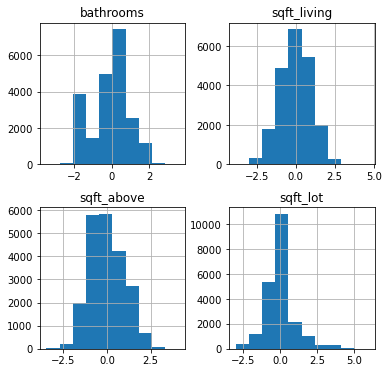

In [17]:
# The log transformations made the continuous data more normal than before
logBathrooms = kc_manipulation_data['bathrooms']
logSqft_living = kc_manipulation_data['sqft_living']
logSqft_above = kc_manipulation_data['sqft_above']
logGrade = kc_manipulation_data['sqft_lot']

scaled_bathrooms = (logBathrooms - np.mean(logBathrooms)) / np.sqrt(np.var(logBathrooms))
scaled_sq_living = (logSqft_living - np.mean(logSqft_living)) / np.sqrt(np.var(logSqft_living))
scaled_sq_above = (logSqft_above - np.mean(logSqft_above)) / np.sqrt(np.var(logSqft_above))
scaled_grade = (logGrade - np.mean(logGrade)) / np.sqrt(np.var(logGrade))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['bathrooms'] = scaled_bathrooms
data_cont_scaled['sqft_living'] = scaled_sq_living
data_cont_scaled['sqft_above'] = scaled_sq_above
data_cont_scaled['sqft_lot'] = scaled_grade


data_cont_scaled.hist(figsize = [6, 6]);

# 

## Modeling

In [18]:
kc_fin_data = pd.DataFrame([])
kc_fin_data['bathrooms'] = scaled_bathrooms
kc_fin_data['sqft_living'] = scaled_sq_living
kc_fin_data['sqft_above'] = scaled_sq_above
kc_fin_data['sqft_lot'] = scaled_grade
price = kc_manipulation_data['price']

kc_fin_data = pd.concat([price, kc_fin_data, condition_dummies, floors_dummies, view_dummies], axis=1)

In [19]:
kc_fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  int32  
 1   bathrooms    21597 non-null  float64
 2   sqft_living  21597 non-null  float64
 3   sqft_above   21597 non-null  float64
 4   sqft_lot     21597 non-null  float64
 5   cond_2       21597 non-null  uint8  
 6   cond_3       21597 non-null  uint8  
 7   cond_4       21597 non-null  uint8  
 8   cond_5       21597 non-null  uint8  
 9   floor_2      21597 non-null  uint8  
 10  floor_3      21597 non-null  uint8  
 11  view_0       21597 non-null  uint8  
 12  view_1       21597 non-null  uint8  
 13  view_2       21597 non-null  uint8  
 14  view_3       21597 non-null  uint8  
 15  view_4       21597 non-null  uint8  
dtypes: float64(4), int32(1), uint8(11)
memory usage: 991.4 KB


### Linear regression using scikit-learn

In [20]:
## Split the data
from sklearn.model_selection import train_test_split
X_predictors = kc_fin_data.drop(['price'], axis=1)
y = kc_fin_data['price']

# split using random state 42
X_train, X_test, y_train, y_test = train_test_split(X_predictors, y, random_state=42, test_size=0.33)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error: ', train_mse)
print('Test Mean Squared Error: ', test_mse)

print("Accuracy of the Linear Regression model is: ", linreg.score(X_train, y_train)*100, "%")
print("Accuracy of the Linear Regression model is: ", linreg.score(X_test, y_test)*100, "%")

Train Mean Squared Error:  73168105080.79199
Test Mean Squared Error:  71803908461.16428
Accuracy of the Linear Regression model is:  46.60053625089545 %
Accuracy of the Linear Regression model is:  45.0776942364709 %


 ### Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

model_2_trainMSE = mean_squared_error(y_train, model_2.predict(X_train))
model_2_testMSE = mean_squared_error(y_test, model_2.predict(X_test))

print('Train Mean Squared Error: ', model_2_trainMSE)
print('Test Mean Squared Error: ', model_2_testMSE)

print("Accuracy of the Decision Tree model is: ", model_2.score(X_train, y_train)*100, "%")
print("Accuracy of the Decision Tree model is: ", model_2.score(X_test, y_test)*100, "%")

Train Mean Squared Error:  93260173.70736286
Test Mean Squared Error:  91960578333.13826
Accuracy of the Decision Tree model is:  99.93193696543565 %
Accuracy of the Decision Tree model is:  29.659998882438366 %


### Cross Validation

In [24]:
from sklearn.model_selection import cross_validate

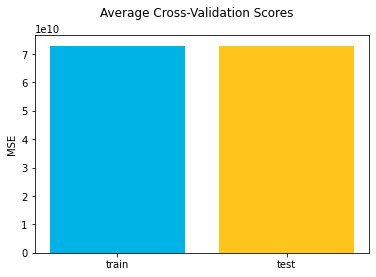

In [25]:
# Linear Regression
cross_val_results = cross_validate(linreg, X_predictors, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)

train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()

fig, ax = plt.subplots()
labels = ["train", "test"]
colors = ["#00B3E6", "#FFC51B"]
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

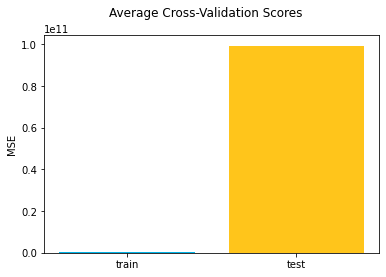

In [26]:
# Decision Tree Regression
cross_val_results = cross_validate(model_2, X_predictors, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)

train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()

fig, ax = plt.subplots()
labels = ["train", "test"]
colors = ["#00B3E6", "#FFC51B"]
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

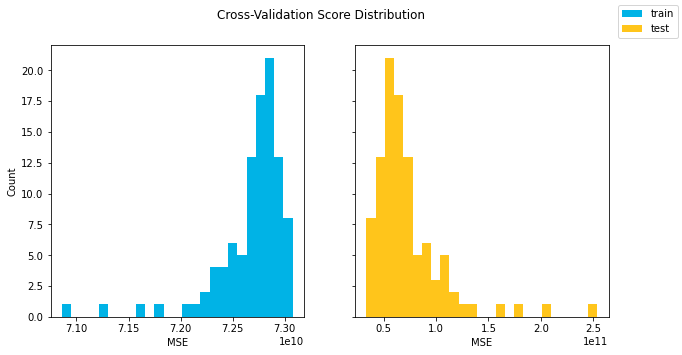

In [27]:
cross_val_results = cross_validate(linreg, X_predictors, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

## In the end, both the linear regression and decision tree regression models failed to achieve good levels of accuracy and due to a time constraint, I believe that this is the best of what I could do given the amount of time on my hands.
